# Redo

Import packages

In [6]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from astropy import units as u
import aplpy
import AG_fft_tools as fft_tools
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel 
from astropy.modeling.models import Gaussian2D
%matplotlib inline

Use Oph L1688 Herschel 250 um map as model image.
L1688 is located at ∼135 pc. Herschel 250 um map's resolution is 18" and pixel size is 6".

Plot model image, the source is about 3 deg * 3 deg

INFO: Auto-setting vmin to -9.325e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.035e+03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.325e+02 [aplpy.core]


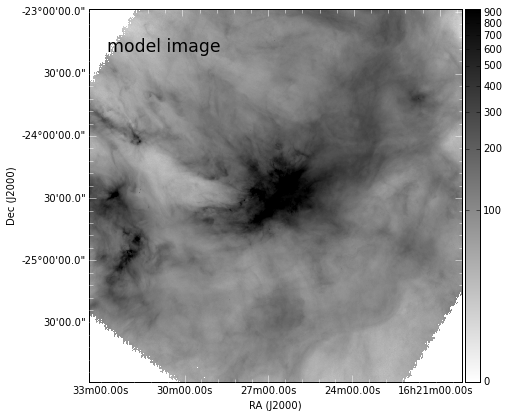

In [8]:
#define input and output file name, and import model map
N_file='/Users/shjiao/desktop/Ophiuchus/redo/spire250.fits'
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/spire250.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_model.add_label(0.2,0.9, 'model image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(246.6879631142824,-24.48757996761378,width=3.,height=3.)

# Smooth the model image to the corresponding angular resolution, before scaling the pixel size and intensity.


The physical scale resolved by the scuba2-850 micron resolution (14" angular resolution) at d～1350 pc will correspond to that resolved by a 135" angular resolution observation for a d～140 pc source.
We need to smooth Herschel 250 um image from 18" resolution to 135" resolution. 

In [9]:
#import model map
Model_file='/Users/shjiao/desktop/Ophiuchus/redo/spire250.fits'
hdu_mod=fits.open(Model_file)
data_mod = hdu_mod[0].data
data_mod = np.nan_to_num(data_mod)
header = hdu_mod[0].header


target_resolution = 135.
native_beamsize = 18.
pixel_size = 6.0

FWHM_TO_SIGMA = 1./np.sqrt(8*np.log(2))

kernel_size=((target_resolution*FWHM_TO_SIGMA)**2-(native_beamsize*FWHM_TO_SIGMA)**2)**0.5
pixel_n = kernel_size/pixel_size
gauss_kernel =Gaussian2DKernel(pixel_n)
smoothed_data_gauss = convolve(data_mod, gauss_kernel,normalize_kernel=True)

#save fits file
outpath = r'/Users/shjiao/desktop/Ophiuchus/redo/spire250.sm.fits'

fits.writeto(outpath,smoothed_data_gauss,header=header) 
fits.setval(outpath,'BMAJ',value=target_resolution/3600.)  
fits.setval(outpath,'BMIN',value=target_resolution/3600.) 

Plot the smoothed image

INFO: Auto-setting vmin to -9.429e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.047e+03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.429e+02 [aplpy.core]


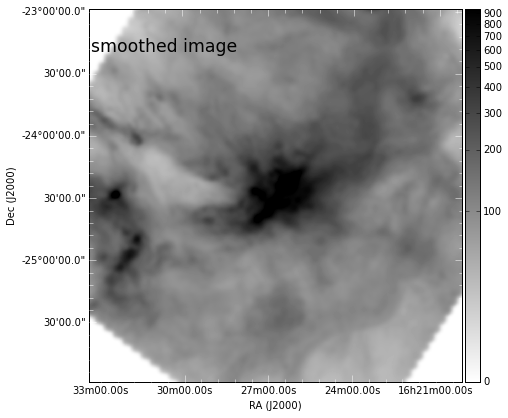

In [10]:
#import smoothed model map
f_model = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/spire250.sm.fits', figsize=(7,7))
f_model.add_label(0.2,0.9, 'smoothed image', color='black', relative=True, size='xx-large',layer='source')
f_model.show_grayscale()
f_model.add_colorbar()
f_model.colorbar.show()
f_model.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_model.recenter(246.6879631142824,-24.48757996761378,width=3.,height=3.)

Scale the pixel size and intensity

In [11]:
#import smoothed map
sm_file='/Users/shjiao/desktop/Ophiuchus/redo/spire250.sm.fits'
hdu_sm=fits.open(sm_file)


data_scale = hdu_sm[0].data
#Scale the intensity
data_scale = data_scale/(83333.*5)

nheader = hdu_sm[0].header

#Scale the pixel size and position
nheader['CDELT1'] = -0.00016666667
nheader['CDELT2'] = 0.0001666666666667
nheader['CRVAL1'] = 84.2304166666667
nheader['CRVAL2'] = -5.2835555555555

outpath = r'/Users/shjiao/desktop/Ophiuchus/redo/spire250.scale.fits'

fits.writeto(outpath,data_scale,header=nheader) 

Plot scaled image

INFO: Auto-setting vmin to -2.263e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.512e-03 [aplpy.core]
INFO: Auto-setting vmin to  0.000e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.263e-03 [aplpy.core]


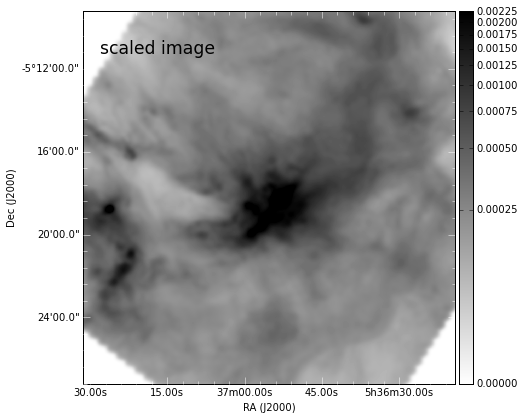

In [12]:
f_scaled = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/spire250.scale.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_scaled.add_label(0.2,0.9, 'scaled image', color='black', relative=True, size='xx-large',layer='source')
f_scaled.show_grayscale()
f_scaled.add_colorbar()
f_scaled.colorbar.show()
f_scaled.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_scaled.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Plot fake map

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.614e-03 [aplpy.core]
INFO: Auto-setting vmax to  8.663e-03 [aplpy.core]


/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting vmin to -7.648e-04 [aplpy.core]
INFO: Auto-setting vmax to  7.729e-03 [aplpy.core]


/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/ma/core.py:790: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


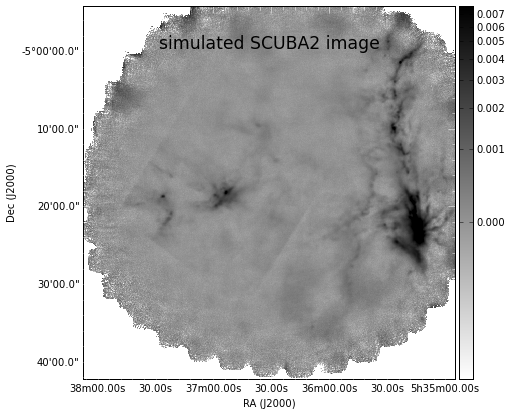

In [18]:
#define input and output file name, and import model map
f_sim = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/blank850_fake.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_sim.add_label(0.5,0.9, 'simulated SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_sim.show_grayscale()
f_sim.add_colorbar()
f_sim.colorbar.show()
f_sim.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_sim.recenter(84.1304166666667,-5.3035555555555,width=0.8,height=0.8)

Regrid the simulated SCUBA2 image to have the same pixel size of the scaled map for comparing it with our scaled model map.

Plot the re-grided simulated SCUBA2 observation

INFO: Auto-setting vmin to -4.488e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.192e-03 [aplpy.core]
INFO: Auto-setting vmin to -2.306e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.952e-03 [aplpy.core]


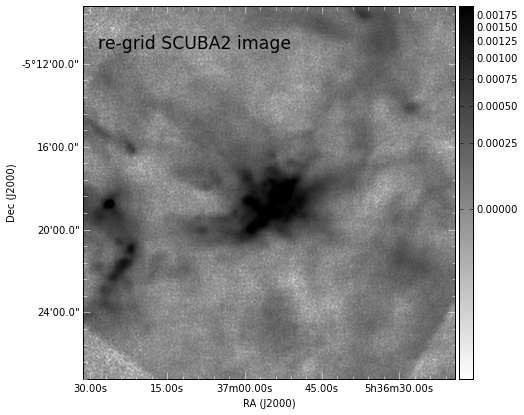

In [20]:
#define input and output file name, and import model map
f_reg = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/blank850_fake.regrid.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_reg.add_label(0.3,0.9, 're-grid SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_reg.show_grayscale()
f_reg.add_colorbar()
f_reg.colorbar.show()
f_reg.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_reg.recenter(84.2304166666667,-5.3035555555555,width=0.3,height=0.3)

Cut the center region out to avoid the edge effect.

INFO: Auto-setting vmin to -2.077e-04 [aplpy.core]
INFO: Auto-setting vmax to  4.088e-03 [aplpy.core]
INFO: Auto-setting vmin to  1.473e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.698e-03 [aplpy.core]
INFO: Auto-setting vmin to -4.509e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.658e-03 [aplpy.core]
INFO: Auto-setting vmin to -1.113e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.284e-03 [aplpy.core]


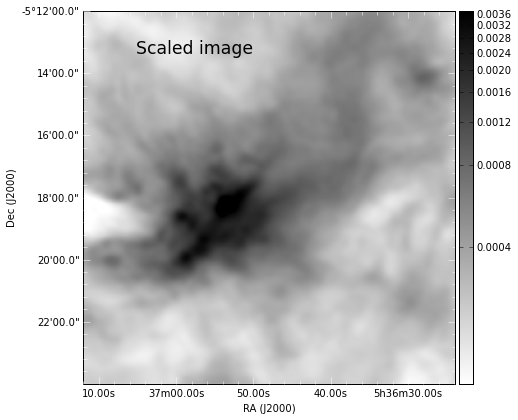

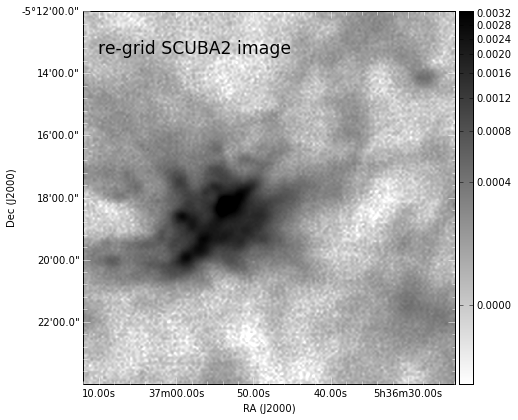

In [31]:
#define input and output file name, and import model map
f_reg = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/cut/spire250.scale.cutad.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_reg.add_label(0.3,0.9, 'Scaled image', color='black', relative=True, size='xx-large',layer='source')
f_reg.show_grayscale()
f_reg.add_colorbar()
f_reg.colorbar.show()
f_reg.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_reg.recenter(84.2,-5.30,width=0.2,height=0.2)

#define input and output file name, and import model map
f_reg = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/cut/blank850_fake.regrid.cutad.fits', figsize=(7,7))
#f_model.colorbar.set_axis_label_text('Flux(Jy/pixel)')
f_reg.add_label(0.3,0.9, 're-grid SCUBA2 image', color='black', relative=True, size='xx-large',layer='source')
f_reg.show_grayscale()
f_reg.add_colorbar()
f_reg.colorbar.show()
f_reg.show_colorscale(cmap='gist_yarg',stretch='arcsinh')
f_reg.recenter(84.2,-5.30,width=0.2,height=0.2)

Compare the power spectrum of the scaled model and simulated SCUBA2 images to identify the largest recoverable angular scales of SCUBA2

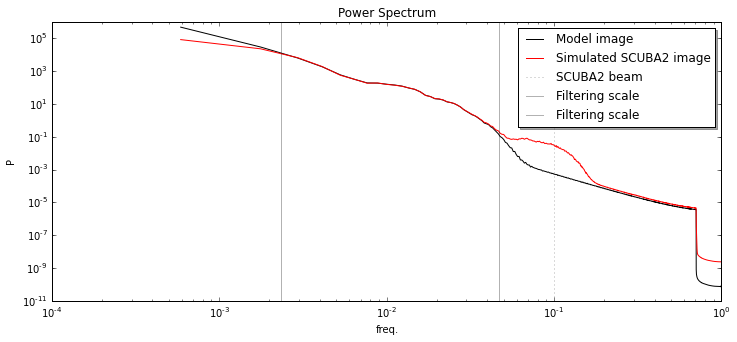

In [36]:
#import model map and simulated SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/redo/cut/spire250.scale.cutad.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

scuba2_file='/Users/shjiao/desktop/Ophiuchus/redo/cut/blank850_fake.regrid.cutad.fits'
hdu_sc2=fits.open(scuba2_file)
data_sc2 = hdu_sc2[0].data

frequency_mod,zz1 = fft_tools.PSD2(data_mod,fft_pad=True,oned=True,view=False,wavnum_scale=False)
frequency_sc2,zz2 = fft_tools.PSD2(data_sc2,fft_pad=True,oned=True,view=False,wavnum_scale=False)


fig, ax = plt.subplots(figsize=(12,5))
ax.plot((frequency_mod),(zz1),linewidth=1.,color='black',label='Model image')
ax.plot((frequency_sc2),(zz2),linewidth=1.,color='red',label='Simulated SCUBA2 image')

#add beam/filtering info
beam_smo_freq = 0.6/(14.0/2.35)
ax.axvline(x=beam_smo_freq,linestyle=':',color='k',alpha=0.3,label='SCUBA2 beam')
filter_scale = 0.6/(10.*60./2.35)
ax.axvline(filter_scale,linestyle='-',color='k',alpha=0.3,label='Filtering scale')
filter_scale1 = 0.6/(30./2.35)
ax.axvline(filter_scale1,linestyle='-',color='k',alpha=0.3,label='Filtering scale')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('freq.')
ax.set_ylabel('P')
ax.set_title('Power Spectrum')
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

plt.show()

Subtract the simulated image from the model image

INFO: Auto-setting vmin to -4.740e-05 [aplpy.core]
INFO: Auto-setting vmax to  6.116e-04 [aplpy.core]
INFO: Auto-setting vmin to  7.064e-06 [aplpy.core]
INFO: Auto-setting vmax to  5.517e-04 [aplpy.core]


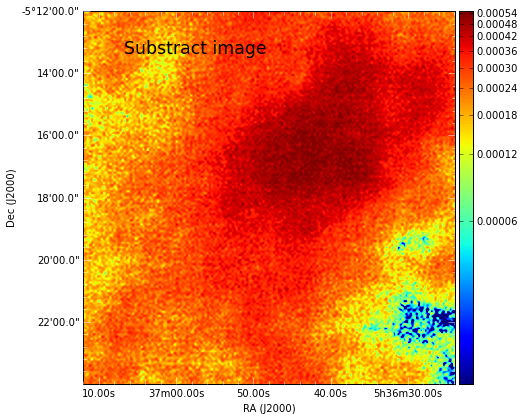

In [33]:
#import model map and simulated SCUBA2 map
model_file='/Users/shjiao/desktop/Ophiuchus/redo/cut/spire250.scale.cutad.fits'
hdu_mod=fits.open(model_file)
data_mod = hdu_mod[0].data

header = hdu_mod[0].header

scuba2_file='/Users/shjiao/desktop/Ophiuchus/redo/cut/blank850_fake.regrid.cutad.fits'
hdu_sc2=fits.open(scuba2_file)
data_sc2 = hdu_sc2[0].data

data_sbu = data_mod - data_sc2

outpath = r'/Users/shjiao/desktop/Ophiuchus/redo/cut/subtract.fits'
fits.writeto(outpath,data_sbu,header=header)


f_reg = aplpy.FITSFigure('/Users/shjiao/desktop/Ophiuchus/redo/cut/subtract.fits', figsize=(7,7))
f_reg.add_label(0.3,0.9, 'Substract image', color='black', relative=True, size='xx-large',layer='source')
f_reg.show_grayscale()
f_reg.add_colorbar()
f_reg.colorbar.show()
f_reg.show_colorscale(stretch='arcsinh')
f_reg.recenter(84.2,-5.30,width=0.2,height=0.2)